# Detectie van gezichten

### Stijn Oomes
donderdag 10 februari 2022

## Importeer libraries

Importeer de relevante libraries.

`opencv` en `numpy`en `matplotlib`

In [3]:
import cv2 as cv

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
print(cv.__version__)

4.5.5


## Importeer en toon afbeelding

Zoek een kleuren foto met 7 gezichten of meer.

Laad de afbeelding in.

Laat de foto op het scherm zien. Hoeveel gezichten zie je zelf?
 
Hint: `imread`, `imshow` uit de matplotlib library

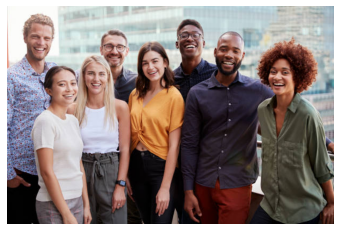

In [5]:
# jouw code

img = plt.imread("faces.jpg")

plt.axis('off')
plt.imshow(img)

#8 gezichten


Welk datatype heeft de ingeladen afbeelding?


Hoe groot is de afbeelding in pixels?

In [6]:
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(408, 612, 3)


## Zet een kleurenplaatje om in een grijswaarde plaatje.

Als je foto al zwart-wit is dan kun je deze stap overslaan.

In [7]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

(408, 612)


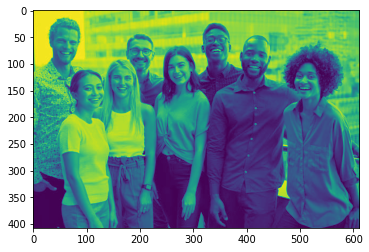

In [8]:
print(gray.shape)
plt.imshow(gray)

## Initieer detector

Zoek het pad van de .xml file met de classifier: haarcascade_frontalface_default.xml

Initieer de Cascade Classifier.

In [9]:
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

print("Is de classifier leeg? --> " + str(face_cascade.empty()) + "  (moet 'False', dus 'niet leeg', zijn)")

Is de classifier leeg? --> False  (moet 'False', dus 'niet leeg', zijn)


## Detecteer gezichten

Bepaal met de classifier ``face_cascade.detectMultiScale()`` de gezichten in het plaatje.

Hoeveel heb je er gevonden?

In [10]:
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)

print("Aantal gezichten: " + str(faces.shape[0]))

Aantal gezichten: 8


## Toon rechthoeken rond gezichten

Toon rechthoeken om de gevonden gezichten.

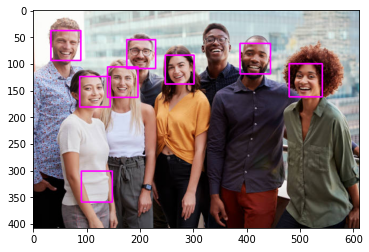

In [11]:
# jouw code
for (x, y, w, h) in faces:
    cv.rectangle(img,(x,y),(x + w, y + h),(255,0,255),2)
 
plt.imshow(img)


## Evalueer de resultaten

#### Vraag:
Hoe goed is jouw detector in vergelijking met wat je zelf ziet?

Kun je de parameters van `face_cascade.detectMultiScale` varieren zodat de detectie beter wordt?

#### Antwooerd:

Het klopt dat er 8 gezichten zijn en het resultaat geeft aan dat er 8 gezichten zijn, maar de laatste gezicht klopt niet. Als je naar de vierkantjes kijkt, zie je rechtsonder dat het de keel van het meisjes als een gezicht ziet en niet het gezicht zelf.

Je kan de image verbeteren door extra paramaters mee te geven, zoals minNeighbors en scaleFactor.

## Bonus 1: analyseer de afbeeldingen uit je webcam

#### Note: opent in nieuwe window!

Hint: ``VideoCapture()`` uit de ``OpenCV`` library

In [ ]:
# jouw code

cap = cv.VideoCapture(0)

while True:
    _, img = cap.read()
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    for (x, y, w, h) in faces:
        cv.rectangle(img, (x,y), (x+w, y+h), (255, 0, 255), 5)
    cv.imshow('img', img)
    escape = cv.waitKey(30) & 0xff
    if escape == 27:
        break
        
cap.release()
        



## Bonus 2: detecteer ook de ogen en de mond.

Hint: er zijn nog meer .xml files met detectoren

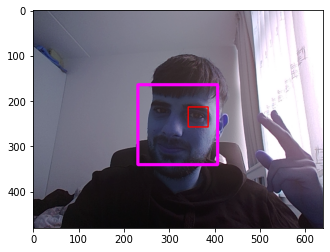

In [22]:
eye_cascade = cv.CascadeClassifier('haarcascade_eye.xml')

eyes = eye_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=2)

for (x,y,w,h) in eyes:
    cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

plt.imshow(img)
            
